1. Cross Validation done wrong.

* Pick 50 training points uniformly at random from a space of 1,000 predictors, each with values between -1 and 1.
* Assign a class of 0 or 1 at random to each training point.
* Choose the 50 predictors with highest correlation (positive or negative) to the class labels.
* Use those 50 predictors to fit a multivariate logistic model to the data, using 5-fold CV.
* What is the estimated test error? What will the actual test error be?
* Discuss what's wrong and how to fix it.

In [93]:
import numpy as np
import pandas as pd 
import random

x = []
y = []
foo = [0, 1]
for i in range(50):
    point = np.random.uniform(-1,1,1000)
    assigned_class = random.choice(foo)
    x.append(point)
    y.append(assigned_class)
    
x = np.array(x)
y = np.array(y)

df = pd.DataFrame(data=x)
df['y'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,y
0,-0.366748,0.100619,-0.892637,0.301010,-0.666246,-0.330541,-0.703674,-0.621062,0.695167,-0.918674,...,0.266348,0.122490,0.923214,0.106023,-0.343050,-0.140817,0.367668,0.687890,-0.899859,1
1,0.329519,-0.776190,-0.076880,-0.229845,-0.739654,0.968763,0.364334,0.873849,-0.833543,-0.521601,...,-0.065884,-0.845229,0.638266,0.760926,0.454736,0.992653,-0.939394,0.075003,0.776047,1
2,-0.951588,0.017340,0.424118,-0.642542,0.572098,0.925933,-0.479382,0.870330,0.650130,0.247728,...,0.117771,-0.936692,-0.973621,0.649528,0.221880,-0.565495,-0.558369,0.103778,-0.352521,0
3,-0.502654,-0.490307,0.795844,-0.990226,-0.258012,0.053198,-0.077363,-0.858374,-0.540148,-0.807974,...,0.324635,-0.991101,-0.258208,0.078209,-0.067141,-0.730180,0.629627,-0.163791,0.621326,0
4,0.749013,-0.304119,0.770020,-0.045364,-0.123389,0.902632,-0.438046,0.148432,0.857715,-0.652853,...,0.228829,-0.704730,-0.966439,0.425631,-0.736355,-0.620565,0.967580,0.294766,0.397679,1


In [94]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,y
0,1.000000,-0.020460,0.155740,-0.018084,-0.135355,-0.148893,0.032955,-0.033765,-0.038753,0.159953,...,0.058934,-0.143293,-0.054432,-0.151875,-0.028303,0.372704,-0.012408,0.007241,-0.048608,0.149678
1,-0.020460,1.000000,-0.211148,-0.015651,0.219418,-0.238953,0.100785,-0.055679,0.246766,0.035979,...,-0.116114,-0.053988,-0.092456,0.104096,0.055546,-0.047207,0.113093,-0.081298,-0.108193,0.243637
2,0.155740,-0.211148,1.000000,-0.018122,0.012610,0.206801,-0.168569,0.245777,0.055606,0.303956,...,-0.179427,0.016248,-0.189336,0.228890,-0.109844,-0.074214,-0.053630,0.056788,0.013861,-0.376864
3,-0.018084,-0.015651,-0.018122,1.000000,-0.179709,-0.127704,-0.185776,-0.135978,0.060688,-0.148419,...,-0.168716,-0.051321,-0.061294,-0.074025,0.088340,-0.289476,0.086603,0.038388,-0.305258,-0.219297
4,-0.135355,0.219418,0.012610,-0.179709,1.000000,-0.178157,0.061234,0.014187,0.165197,0.197485,...,-0.016145,0.043896,0.125817,0.091586,0.124123,-0.094734,-0.022392,-0.462359,0.081245,-0.054584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.372704,-0.047207,-0.074214,-0.289476,-0.094734,-0.004876,0.235107,-0.009476,0.051937,0.161037,...,0.253809,0.053549,0.131039,-0.068679,-0.097100,1.000000,-0.319491,0.057724,0.129288,0.385213
997,-0.012408,0.113093,-0.053630,0.086603,-0.022392,-0.230056,-0.106501,-0.303559,-0.055930,-0.004781,...,0.101404,0.097194,0.014710,-0.177833,-0.326468,-0.319491,1.000000,0.100058,-0.082855,-0.009175
998,0.007241,-0.081298,0.056788,0.038388,-0.462359,0.216927,-0.218460,0.252561,0.099795,-0.119833,...,-0.049204,0.032255,-0.004667,-0.239323,-0.145237,0.057724,0.100058,1.000000,0.006751,0.075434
999,-0.048608,-0.108193,0.013861,-0.305258,0.081245,0.055183,0.018516,-0.208208,-0.018085,-0.015733,...,0.054432,0.074435,0.051886,0.001353,-0.034196,0.129288,-0.082855,0.006751,1.000000,0.241839


In [95]:
y_corr = df.corr().abs()['y']
print(type(y_corr))

print(y_corr.nlargest(51).index)
y_corr.nlargest(51)


<class 'pandas.core.series.Series'>
Index(['y', 782, 380, 103,  10, 996, 298, 653, 691,   2, 935, 905, 135, 348,
       731, 432, 343, 436, 201, 865, 471, 590, 692, 519, 315, 415, 749, 846,
       970, 223, 185,  42, 887, 596, 565, 672, 948, 810, 339, 224, 675, 289,
       614, 832, 259, 497, 107, 133, 816, 857, 229],
      dtype='object')


y      1.000000
782    0.434091
380    0.415356
103    0.390153
10     0.388762
996    0.385213
298    0.382790
653    0.379720
691    0.378186
2      0.376864
935    0.375540
905    0.364372
135    0.360322
348    0.358375
731    0.354681
432    0.352047
343    0.338360
436    0.334976
201    0.334623
865    0.324990
471    0.319905
590    0.319374
692    0.318372
519    0.315229
315    0.313512
415    0.310700
749    0.310449
846    0.309849
970    0.305298
223    0.304695
185    0.304364
42     0.301683
887    0.299125
596    0.298889
565    0.297942
672    0.294938
948    0.294823
810    0.293833
339    0.293761
224    0.293729
675    0.293053
289    0.290030
614    0.289365
832    0.288874
259    0.287672
497    0.287554
107    0.287196
133    0.286540
816    0.286269
857    0.286015
229    0.285611
Name: y, dtype: float64

In [96]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm
import statsmodels.api as sm

#formula = 'y ~ Q("917")+288+305+4+48+164+946+15+421+996+950+309+641+687+531+810+552+163+949+788+523+412+994+845+751+455+872+1+80+756+253+777+991+693+293+467+14+266+880+530+895+210+898+130+406+433+456+330+96+658")'
formula = 'y ~ Q("917") + Q("305")'
df2 = df.filter(['y', 917, 288, 305,   4,  48, 164, 946,  15, 421, 996, 950, 309, 641,
       687, 531, 810, 552, 163, 949, 788, 523, 412, 994, 845, 751, 455, 872,
         1,  80, 756, 253, 777, 991, 693, 293, 467,  14, 266, 880, 530, 895,
       210, 898, 130, 406, 433, 456, 330,  96, 658], axis=1)
df2.head()

,y,917,288,305,4,48,164,946,15,421,...,895,210,898,130,406,433,456,330,96,658
0,1,-0.528906,-0.410804,-0.188382,-0.666246,-0.867426,-0.448797,-0.213241,0.210711,0.441538,...,-0.764903,0.870208,-0.271115,0.297168,0.603922,-0.563026,0.094350,0.950587,-0.351079,0.497688
1,1,-0.987224,-0.726957,-0.062300,-0.739654,-0.378385,0.349080,0.825335,0.093671,-0.766708,...,-0.907211,0.322687,0.740008,0.433573,-0.003886,-0.938078,-0.071482,-0.083702,0.072689,-0.376772
2,0,0.808545,-0.097781,0.785170,0.572098,0.149649,-0.243643,0.118952,-0.585057,0.880953,...,0.253652,-0.038946,0.190514,0.684397,-0.224684,0.021527,-0.869607,-0.953022,-0.180143,0.034739
3,0,-0.127005,0.483621,-0.757423,-0.258012,0.983391,-0.916171,0.259835,0.850247,-0.236623,...,-0.477956,0.001982,0.988494,-0.723611,-0.520876,0.491451,0.826278,0.887778,0.793532,-0.340191
4,1,-0.895758,0.236339,0.472089,-0.123389,0.875531,0.474046,-0.791924,-0.285321,0.777368,...,-0.566466,-0.850353,-0.818247,0.441961,0.591323,0.084807,-0.540921,0.027665,-0.469095,-0.933811


In [99]:

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = df2.iloc[:,[1,50]]
y = df2['y']

cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression()

# Evaluating accuracy
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("scores")
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores
[0.5 0.7 0.7 0.6 0.8]
Accuracy: 0.660 (0.102)


## What is the estimated test error? What will the actual test error be?

* Accuracy: Overall, how often is the classifier correct? (TP + TN)/total
* In the first iteration, the accuracy is 60%
* Second iteration, the accuracy is 70% and so on

## Discuss what's wrong and how to fix it.
* what is wrong is that we picked the most 50 correlated predictors before dividing the data into folds. To correct it, we should pick the correlated pridctors after separating one part of the data as a validation set

2. LOOCV. This problem is modeled on chapter 5, problem 8, but instead of LaTeX: y = x - 2x^2 + \epsilony = x − 2 x 2 + ϵ 
* I will ask you to use the function and models from the Week 02 assignment. 
* You may start with your solution or start with my solution instead.

* Modify the Week 02 assignment notebook to generate just two training set of 15 points each instead of 10 training sets.
* Create a scatterplot of Y versus X. for each training set. Comment on what you find.
--------
* Fit each of the five polynomial models from the Week 02 assignment to both training sets. Compute the LOOCV estimate of test error each time. That's 10 estimates.
* Compare the five estimates from the first training set to the five estimates from the second training set and comment on what you see.
* Compare the five models. Which had the smallest LOOCV estimate for the first training set? For the second training set? Is this what you expected? Explain.
* Print a summary of each model fit. Consider the statistical significance of each variable in each model fit. Do these reported statistical significances agree with the conclusions you drew from the LOOCV estimates in part E?

In [17]:
x1train = np.random.uniform(0, 5, (2, 15))
ytrain = (x1train**3 - 5*x1train**2 + x1train + 2 + np.random.normal(0, 2, (2, 15)))
print(x1train.shape, ytrain.shape)

(2, 15) (2, 15)


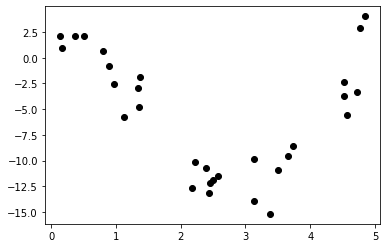

In [18]:
plt.plot(x1train, ytrain, 'o', color='black');

### Comment on what you find
The data made a parabola with a big minima around x=3 ands a small one on the top left I think?!

In [23]:
import pandas as pd
import numpy as np
import numpy
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

lm = skl_lm.LinearRegression()
x1 = x1train[0].reshape(-1,1)
x2 = x1train[1].reshape(-1,1)
y1 = ytrain[0].reshape(-1,1)
y2 = ytrain[1].reshape(-1,1)
x_all = numpy.append(x1, x2).reshape(-1,1)
y_all = numpy.append(y1, y2).reshape(-1,1)

model = lm.fit(x_all, y_all)

In [27]:
x = x1
y = y1

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(x)
    model1 = lm.fit(X_current, y)
    scores = cross_val_score(model1, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 44.11490924516916, STD: 52.90002044326817
Degree-2 polynomial MSE: 2.82958936362253, STD: 4.174417730481867
Degree-3 polynomial MSE: 3.2061941038269923, STD: 4.379930506234112
Degree-4 polynomial MSE: 4.096182840937447, STD: 5.229625200021677
Degree-5 polynomial MSE: 6.417924505481303, STD: 7.975795879401264


x = x2
y = y2

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(x)
    model2 = lm.fit(X_current, y)
    scores = cross_val_score(model2, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

### Compare the five models

* The MSE estimate of the degree 1 polynomial in both training sets is the hegihst or worst. This is probably because the model is too simple and didn't capture enough details about the data.

* The estimate values (3, 4, 6) were repeated in both of them. The difference between those values is very small, +/- 1 or 2. Even though it was repeated for different degrees, for example:
  - 1] In the first data set degree 3 had MSE of 3 and degree 4 had MSE 0f 4
  - 2] In the second data set degree 3 had MSE of 4 and degree 4 had MSE 0f 3
  - 3] This lead me to think that those models are probably the same in terms of which is better. It might have been that degree 4 is the same as degree 3 but with a zero estimate for the x^4 predictor?!
  - 4] Also since the different between the last four models is very small, I assumed that what I mentioned in point 3] applies to them too in general

### . Which had the smallest LOOCV estimate for the first training set? For the second training set? Is this what you expected? Explain.

* For the first training set, Degree 2 had the smallest estimate of MSE = 2.8
* For the second training set, Degree 4 had the smallest estimate of MSE = 3.4
* I expected the least MSE will be eaither degree 2 or 3 just because in the original plot of the two data sets, there is a global minima around x=3 and another very small curve around x=0.5. 
* Sometimes I don't get that small curve when I plot different data sets, so this is why I said either degree 2 or 3


In [100]:
from regressors import stats


xlabels = np.array(["X"])
print("\n=========== SUMMARY ===========")
print(x.shape)
print(y.shape)
print(xlabels.shape)
stats.summary(model1, x, y, xlabels) # I don't know why it doesn't like my "xlabels" 😔?


=========== SUMMARY ===========
(50, 1000)
(50,)
(1,)


AssertionError: Dimension of xlabels (1,) does not match X (50, 1000).

### Bootstrap. Chapter 5, problem 9.

#### Number of Cases
 - The dataset contains a total of 506 cases.

#### Variables
  - There are 14 attributes in each case of the dataset. They are:
  - CRIM - per capita crime rate by town
  - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
  - INDUS - proportion of non-retail business acres per town.
  - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  - NOX - nitric oxides concentration (parts per 10 million)
  - RM - average number of rooms per dwelling
  - AGE - proportion of owner-occupied units built prior to 1940
  - DIS - weighted distances to five Boston employment centres
  - RAD - index of accessibility to radial highways
  - TAX - full-value property-tax rate per $10,000 ----
  -  / PTRATIO - pupil-teacher ratio by town
  -   / B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  -   / LSTAT - % lower status of the population
  -   / MEDV - Median value of owner-occupied homes in $1000's
  -------------


In [45]:
import statsmodels.api as sm
from sklearn import datasets

boston = datasets.load_boston()
boston_feat = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_resp = pd.Series(boston.target).rename('medv')
boston_df = pd.concat([boston_feat, boston_resp], axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### (a) Based on this data set, provide an estimate for the population mean of medv.

In [48]:
mu_hat = boston_df['medv'].mean()
display(mu_hat)

22.532806324110677

#### (b) Provide an estimate of the standard error of μˆ Interpret this result.
* SE   = std(medv) / sqrt(len(medv)

In [50]:
medv = np.array(boston_df['medv'])
SE   = np.std(medv) / np.sqrt(len(medv))
display(SE)

0.4084569346972866

* the standard errro is around 0.4. This .......

#### (c) Now estimate the standard error of μˆ using the bootstrap. How does this compare to your answer from (b)?

In [85]:
'''
1. take samples fron the data, with replacement
2. calculate it's mean
3. calculate the STD
4. repeat 1,2,and 3
'''

# Compute standard error of the mean with the bootstrap approach

def mean_boot(df, idx):
    Z = np.array(df.loc[idx])
    return np.mean(Z)

def boot_idx(n):
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
mean_boot2  = boot(mean_boot, boston_df['medv'], samples=B)
SE_pred    = np.std(mean_boot2) 

print('SE: ' + str(SE_pred))

SE: 0.40517204469168827


* The SE from the bootstape is 0.41 which is very close to original SE 0.40 which proves that bootstrap is a great way to get estimates from a sample data when we don't have access to the population or have very small amount of data points
* I tried the below version of code first and didn't work well because it gave me 0.9. I don't understand what I did wrong though?!

In [73]:
from sklearn.utils import resample
# data sample
data = medv
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=100, random_state=1)

def SE(medv):
     return np.std(medv) / np.sqrt(len(medv))
     

def bstrap(df):
    tresult = 0
    for i in range(0,1000):
        X = resample(data, replace=True, n_samples=100, random_state=1)
        result = SE(X)
        tresult += result
    fresult = tresult / 1000
    print(fresult)
    
df3 = pd.DataFrame(medv, columns = ['medv'])    
bstrap(df3)

0.92512288913418


#### (d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results obtained using

*  a 95% confidence interval =  [ μˆ − 2SE(μˆ), μˆ + 2SE(μˆ) ]

In [76]:
mu_hat   = np.mean(boston_df['medv'])
low = mu_hat - (2*SE_pred)
hi  = mu_hat + (2*SE_pred)
print("95 % confidence = (", low, ",", hi,")")

95 % confidence = ( 21.71274877614771 , 23.352863872073645 )


* this means that the range of values of mean for different samples for the "mdev" lies in that range ( 21.71274877614771 , 23.352863872073645 )

#### (e) Based on this dataset, provide an estimate, μˆmed, for the median value of medv in the population

In [77]:
median_hat = np.median(boston_df['medv'])
print('median: ' + str(median_hat))

median: 21.2


#### (f)Estimate the standard error of μˆmed using bootstrap.

In [91]:
'''
1. take n items from the given sample as a new sample
2. calculate the sample median
3. repeat 1 & 2 for B rounds, and we will get B new samples, with B sample medians
4. estimate the standard error of medians
   1.  calculate the mean of the previous sample of medians
'''

def median_boot(df, idx):
    Z = np.array(df.loc[idx])
    return np.median(Z)

def boot_idx(n):
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
boot_obs   = boot(median_boot, boston_df['medv'], samples=B)
SE_pred    = np.std(boot_obs) 

print('SE: ' + str(SE_pred))


SE: 0.37655998828207937


#### g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity μˆ0.1. (You can use the quantile() function.)



In [90]:
tenth_percentile = np.percentile(boston_df['medv'], 10)
print('tenth_percentile: ' + str(tenth_percentile))

tenth_percentile: 12.75


#### h) Use the bootstrap to estimate the standard error of μˆ0.1. Comment on your findings.

In [92]:
def tenth_percentile(df, idx):
    Z = np.array(df.loc[idx])
    return np.percentile(Z, 10)

def boot_idx(n):
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
boot_obs   = boot(tenth_percentile, boston_df['medv'], samples=B)
SE_pred    = np.std(boot_obs) 

print('SE: ' + str(SE_pred))

SE: 0.4973361870757043


* The standard error for the tenth percentile is 0.49 which is very close to the one for the mean and median (mean=0.40 , median= 0.37)that were generated using bootstrape. 
* This is because the tenth percentile value is related to the mean and median values. If the mean increases, the the tenth percentile value will be shifted to a higher value